In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from astropy.io import fits

In [19]:
path = 'D:/Spitzer_Data/XO-3b/Phase_ch2/r46487296/ch2/bcd/SPITZER_I2_46487296_0120_0000_2_bcd.fits'

In [20]:
hdu = fits.open(path)

data = hdu[0].data

C:\Users\Lisa\Anaconda3\lib\site-packages\astropy\io\fits\util.py:578: UserWarning: Could not find appropriate MS Visual C Runtime library or library is corrupt/misconfigured; cannot determine whether your file object was opened in append mode.  Please consider using a file object opened in write mode instead.
  'Could not find appropriate MS Visual C Runtime '


C:\Users\Lisa\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


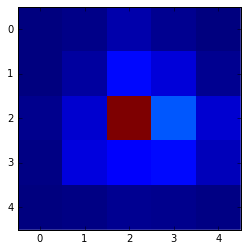

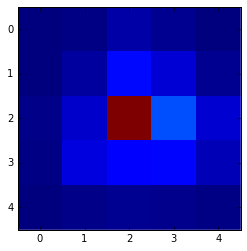

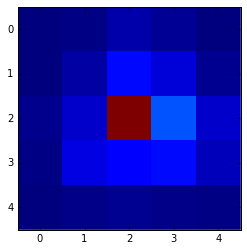

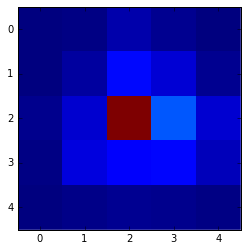

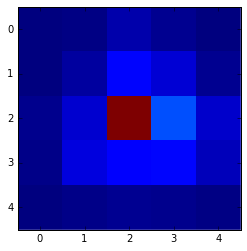

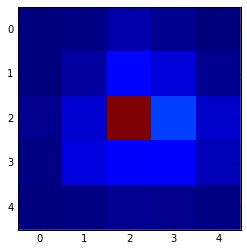

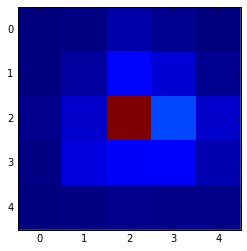

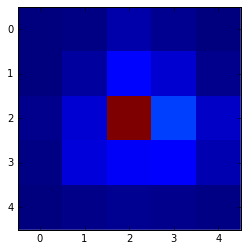

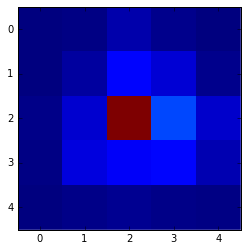

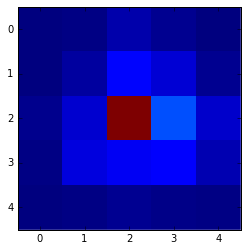

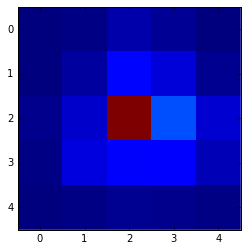

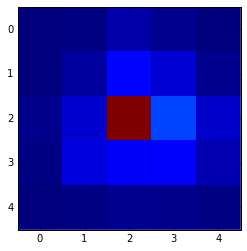

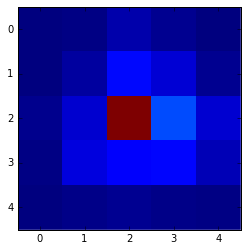

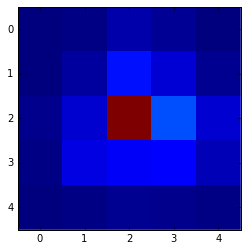

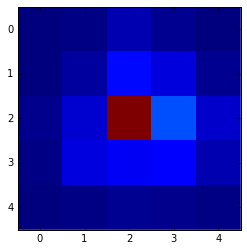

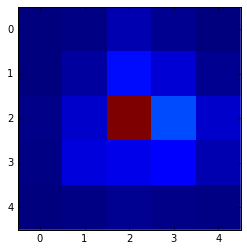

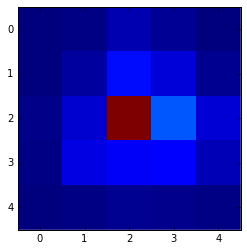

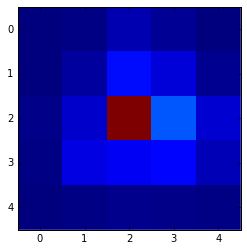

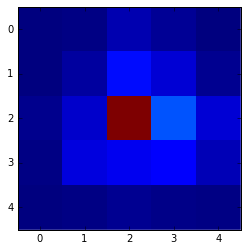

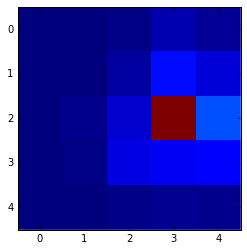

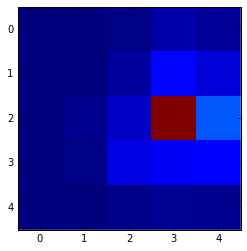

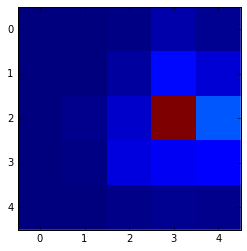

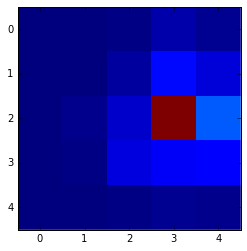

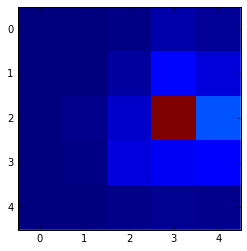

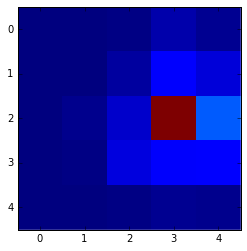

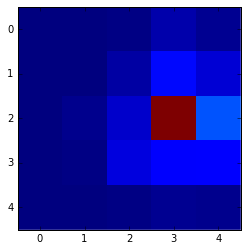

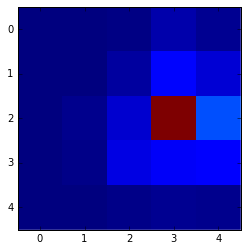

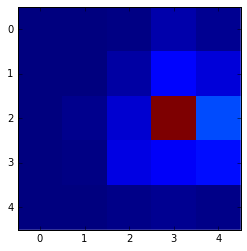

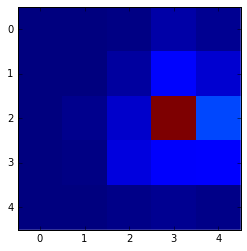

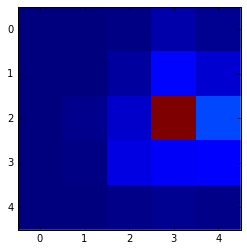

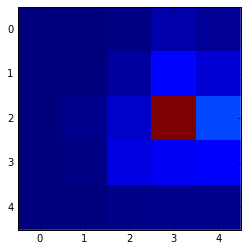

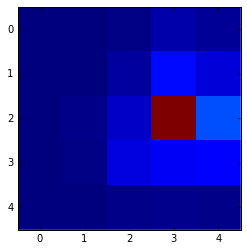

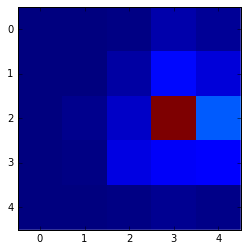

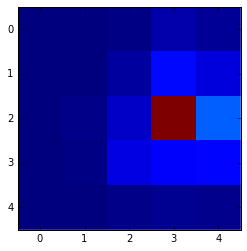

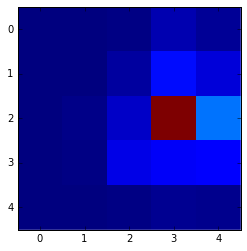

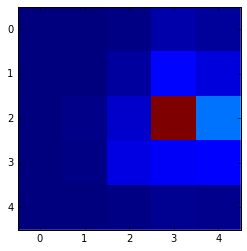

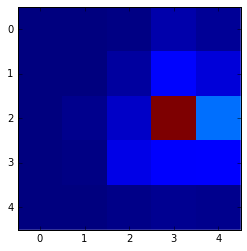

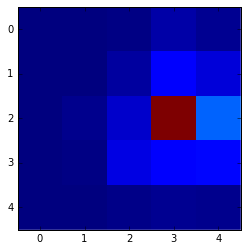

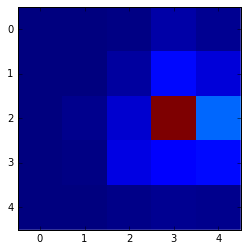

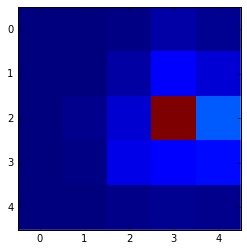

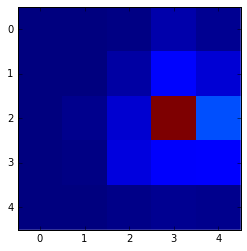

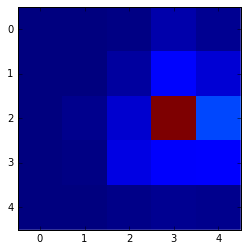

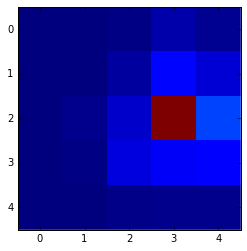

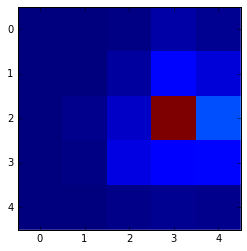

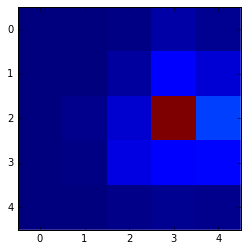

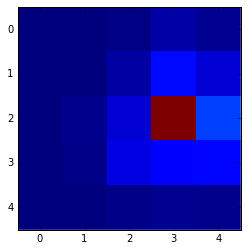

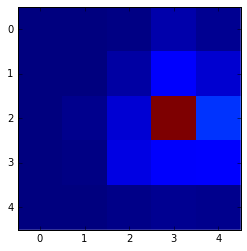

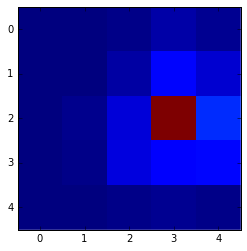

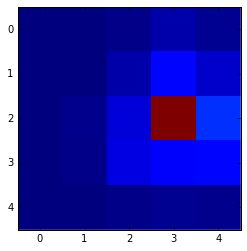

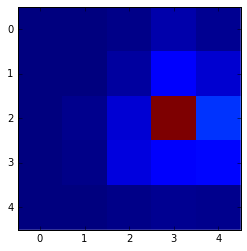

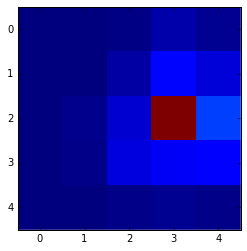

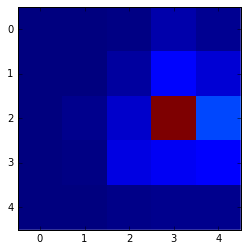

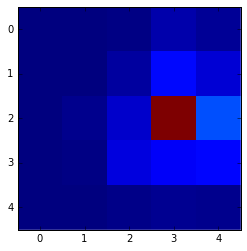

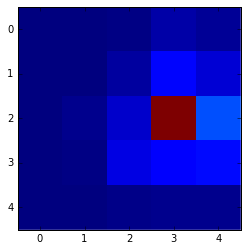

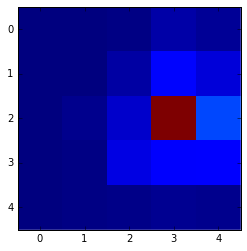

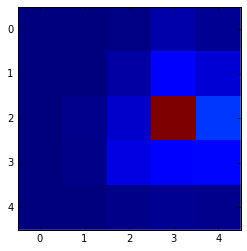

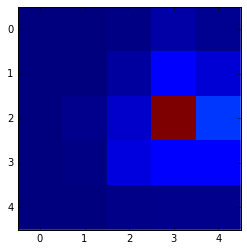

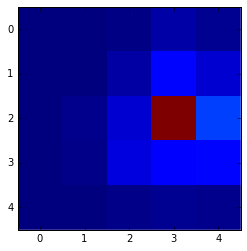

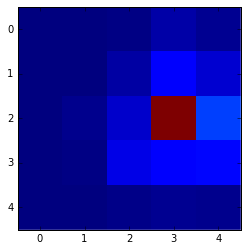

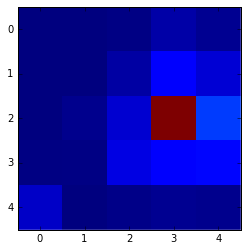

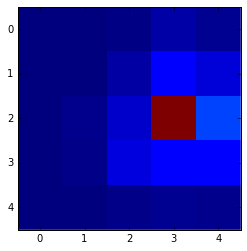

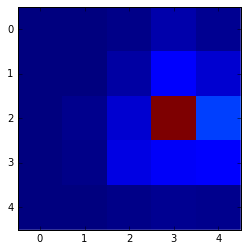

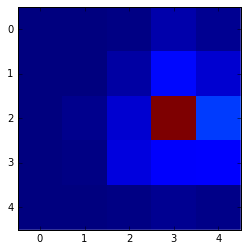

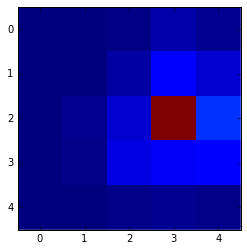

In [25]:
for i in range(64):
    plt.figure()
    plt.imshow(data[i,13:18,13:18], interpolation='none')

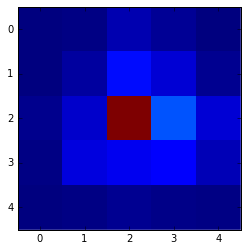

In [28]:
plt.imshow(data[18,13:18,13:18], interpolation='none')

In [5]:
path = 'C:/Users/Lisa/Desktop/Phase_curves/Run3/ch2_datacube_binned_AORs464.dat'

flux = np.loadtxt(path, usecols=[0], skiprows=0)
time = np.loadtxt(path, usecols=[2], skiprows=0)
xdat = np.loadtxt(path, usecols=[4], skiprows=0)
ydat = np.loadtxt(path, usecols=[6], skiprows=0)

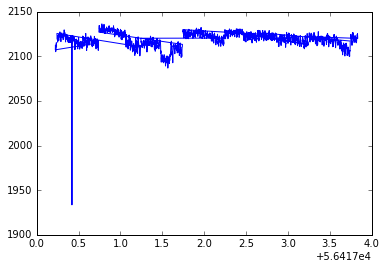

In [6]:
plt.plot(time,flux)

In [7]:
np.where(flux<1950)

(array([2176], dtype=int64),)

In [8]:
ydat[2176]

16.06228146716062

In [12]:
import os
import glob

def get_fnames(directory, AOR_snip, ch):
	'''
	Find paths to all the fits files.

	Parameters
	----------

	:type directory : string object
	:param directory: Path to the directory containing all the Spitzer data.

	:type AOR_snip : string object
	:param AOR_snip: Common first characters of data directory eg. 'r579'

	:type ch : string objects
	:param ch: Channel used for the observation eg. 'ch1' for channel 1	

    Returns
    -------

    :return: fname - (list) - List of paths to all bcd.fits files.
	'''
	lst      = os.listdir(directory)
	AOR_list = [k for k in lst if AOR_snip in k] 
	#AOR_list = np.delete(AOR_list, [0, 4])                # used to ignore calibration data sets
	fnames   = []
	for i in range(len(AOR_list)):
		path = directory + '/' + AOR_list[i] + '/' + ch +'/bcd'	
		fnames.extend([filename for filename in glob.glob(os.path.join(path, '*bcd.fits'))])
	fnames.sort()
	return fnames

In [13]:
directory = 'D:/Spitzer_Data/XO-3b/Phase_ch2'
AOR_snip = 'r464'
ch = 'ch2'

fnames = get_fnames(directory, AOR_snip, ch)

In [15]:
fnames[2176]

'D:/Spitzer_Data/XO-3b/Phase_ch2/r46487296/ch2/bcd\\SPITZER_I2_46487296_0120_0000_2_bcd.fits'